In [1]:
import librosa
import librosa.display
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

## Audio

In [4]:
wav_path = "D:\\projects\\python\\AMT\\data\\raw\\2009\\MIDI-Unprocessed_11_R1_2009_01-05_ORIG_MID--AUDIO_11_R1_2009_11_R1_2009_03_WAV.wav"
y, sr = librosa.load(wav_path, sr=None)

In [5]:
print(f"Number of samples: {len(y)}, Sample Rate: {sr}")

Number of samples: 4057019, Sample Rate: 44100


In [6]:
print(f"Duration: {len(y)/sr}")

Duration: 91.99589569160997


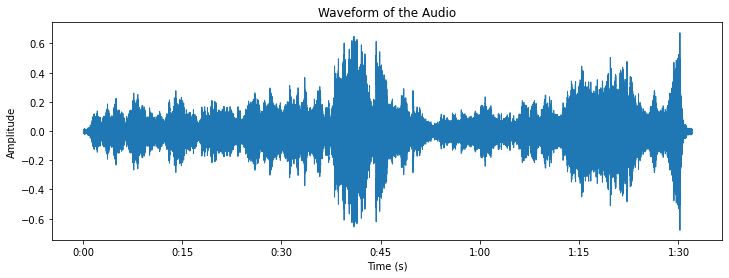

In [7]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of the Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [8]:
def plot_spectrogram(n_bins=288, bins_per_octave=36, hop_length=512):
    # Compute CQT Spectrogram
    C = librosa.cqt(y, sr=sr, hop_length=hop_length, n_bins=n_bins, bins_per_octave=bins_per_octave)
    C_db = librosa.amplitude_to_db(abs(C))  # Convert to dB for better visualization

    # Plot Spectrogram
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(C_db, sr=sr, hop_length=hop_length, bins_per_octave=bins_per_octave, cmap="magma")
    plt.colorbar(label="dB")
    plt.title(f"CQT Spectrogram (n_bins={n_bins}, bins_per_octave={bins_per_octave}, hop_length={hop_length})")
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.show()

In [9]:
# Interactive Widget
interact(
    plot_spectrogram,
    n_bins=widgets.IntSlider(min=36, max=360, step=12, value=288, description="n_bins"),
    bins_per_octave=widgets.IntSlider(min=12, max=48, step=12, value=36, description="bins_per_octave"),
    hop_length=widgets.IntSlider(min=128, max=2048, step=128, value=512, description="hop_length"),
)

interactive(children=(IntSlider(value=288, description='n_bins', max=360, min=36, step=12), IntSlider(value=36…

<function __main__.plot_spectrogram(n_bins=288, bins_per_octave=36, hop_length=512)>

In [10]:
C = librosa.cqt(y, sr=sr, hop_length=512, n_bins=288, bins_per_octave=36)
C_db = librosa.amplitude_to_db(abs(C))  # Convert to dB for better visualization

In [11]:
print(f"Number of Frames: {len(y)/512}")

Number of Frames: 7923.865234375


In [12]:
C.shape

(288, 7924)

In [13]:
C_db.shape

(288, 7924)

In [14]:
frame = C_db[:,1000]

In [15]:
frame.shape

(288,)

In [16]:
type(frame)

numpy.ndarray

## Midi

In [2]:
midi_path = r"D:\projects\python\AMT\data\raw\2009\MIDI-Unprocessed_11_R1_2009_01-05_ORIG_MID--AUDIO_11_R1_2009_11_R1_2009_03_WAV.midi"
midi = pretty_midi.PrettyMIDI(midi_path)

In [5]:
len(midi.instruments[0].notes)

1346

In [6]:
midi_file = midi
# Extract note start times, pitches, and durations
note_start_times = [note.start for note in midi_file.instruments[0].notes]
note_pitches = [note.pitch for note in midi_file.instruments[0].notes]
note_durations = [note.end - note.start for note in midi_file.instruments[0].notes]

In [7]:
len(note_pitches)

1346

In [32]:
import math
fps = math.ceil(sr / 512)
fps

87

In [55]:
piano_roll = midi.get_piano_roll(fs=fps)  # Time resolution matching CQT hop length
piano_roll = piano_roll[21:109, :]  # Select only rows 21 to 108 (88 keys)
piano_roll = (piano_roll > 20).astype(np.float32) # for multipitch esitmation model converting them to binary

In [56]:
piano_roll.shape

(88, 7916)

In [57]:
piano_roll[:,1000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

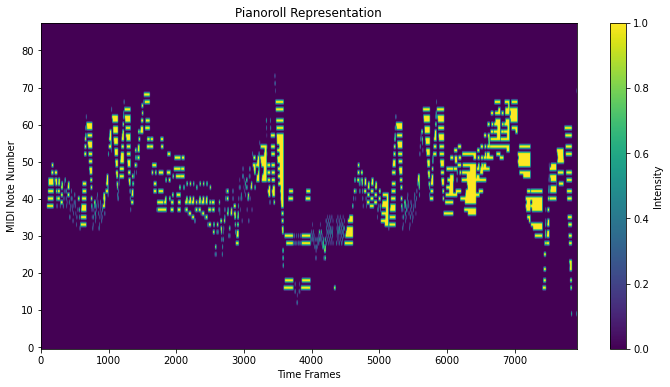

In [58]:
# Plot the pianoroll
plt.figure(figsize=(12, 6))
plt.imshow(piano_roll, aspect="auto", origin="lower")
plt.xlabel("Time Frames")
plt.ylabel("MIDI Note Number")
plt.title("Pianoroll Representation")
plt.colorbar(label="Intensity")
plt.show()